# Silhouette Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics import silhouette_score

sns.set_style("whitegrid")

In [2]:
X = pd.read_csv("./data/data2.csv", header=None).loc[:, [0, 1]]
yCat = pd.read_csv("./data/data2.csv", header=None).loc[:, 2]

The observations in X have been divided into 2 groups using k-means clustering. We can use the [silhouette_visualizer()](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html#yellowbrick.cluster.silhouette.silhouette_visualizer) function to measure how close each observation is to other observations in the same cluster.

c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


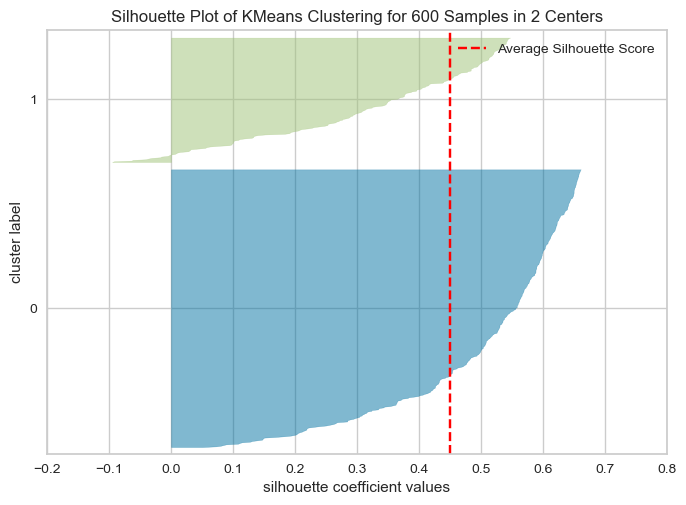

In [3]:
kmeans = KMeans(n_clusters=2, n_init='auto')

plt.figure()
silhouette_visualizer(kmeans, X, colors='yellowbrick')
plt.show()

c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


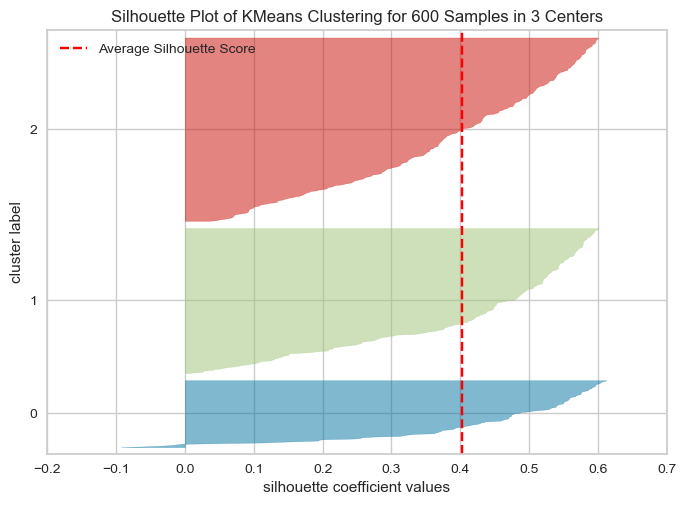

In [4]:
kmeans = KMeans(n_clusters=3, n_init='auto')

plt.figure()
silhouette_visualizer(kmeans, X, colors='yellowbrick')
plt.show()

If we're not certain about how many groups to use, the [silhouette_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) function can help us make the decision.
Then we can use the silhouette scores to evaluate the optimal number of clusters.

In [5]:
silhouette_scores = {}
for n_cluster in range(2, 6):
    clusterer = KMeans(n_clusters=n_cluster, n_init="auto")
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores[n_cluster] = silhouette_avg

c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\luisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [6]:
print("Silhouette evaluation:", silhouette_scores)
print("Optimal number of clusters:", max(silhouette_scores, key=silhouette_scores.get))

Silhouette evaluation: {2: 0.44963435155337134, 3: 0.4020470296974505, 4: 0.3576511655379358, 5: 0.362026691385014}
Optimal number of clusters: 2
